# Running RidgeEnvlp

The `pyenvlp` package contains scikit-learn comapatible Regression class called `RidgeEnvlp`.
`RidgeEnvlp` combined L2 regularization with Envelope Model, allows multi-X fitting similar to 
cannonical regression objects in scikit-learn. In addition, it provides additional statistics
associated with Envelope Model.

In [22]:
import pyenvlp
import numpy as np
import pandas as pd

In [3]:
pyenvlp.RidgeEnvlp?

Docstring:      <no docstring>
Init docstring: __init__(self: pyenvlp._pyenvlp.RidgeEnvlp, fit_intercept: bool = True, l2_lambda: float = 0.0, zscore_x: bool = False, zscore_y: bool = False, do_coef_scale: bool = False, u_step: int = 0) -> None
File:           /nvs/apps/prod/release/kinetic-stable/site-packages/pyenvlp/_pyenvlp.so
Type:           pybind11_type
Subclasses:     

In [18]:
x = np.random.rand(20000, 300)
y = np.random.rand(20000, 1)
rdgenv = pyenvlp.RidgeEnvlp(l2_lambda=0.1)

In [19]:
rdgenv.fit?

Docstring: fit(self: pylinear._pylinear.Regression, x: numpy.ndarray, y: numpy.ndarray, w: numpy.ndarray = array([], dtype=float64)) -> pylinear._pylinear.Regression
Type:      method

In [20]:
rdgenv.fit(x, y)

RidgeEnvlp::computeXEnvGammas: tot_dim=300 u_step=30 u_list=  1  38  75 112 149 186 223 260 297
RidgeEnvlp::computeXEnvGammas: computed best BIC u=1
m_coef_base_ni: (300 x 1) gamma: (300 x 1)


,ridge,envelope
0,0.006923,0.005550
1,-0.001824,-0.001722
2,0.001320,0.000771
3,0.009621,0.006119
4,-0.012909,-0.003391
...,...,...
295,-0.006681,-0.001955
296,-0.013798,-0.007362
297,-0.006306,-0.002974
298,0.001344,0.002575


<Axes: title={'center': 'coefficient comparison between ridge and envelope'}, xlabel='ridge'>

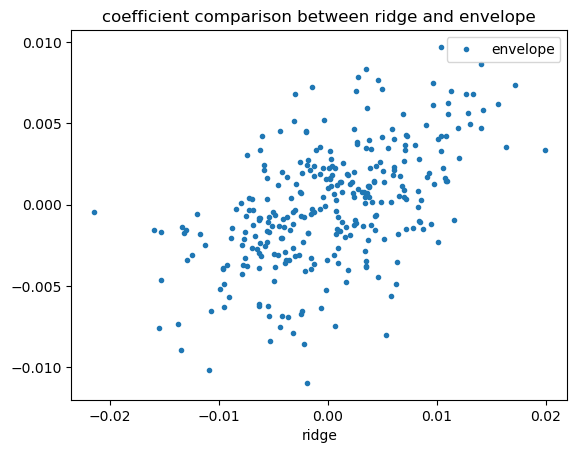

In [28]:
codf = pd.DataFrame({"ridge": rdgenv.coefsbase().flatten(), "envelope":rdgenv.coefs().flatten()})
display(codf)
codf.plot(x='ridge', y='envelope', style='.', title="coefficient comparison between ridge and envelope")